<a href="https://colab.research.google.com/github/tphlabs/python_workshop/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

v.0.1.2

Linear Regression is a fundamental statistical technique used to model the relationship between a dependent variable and one or more independent variables
## 1. Introduction to Linear Regression

Linear Regression aims to find the best-fitting linear relationship between the dependent variable (often called the response or target) and the independent variable(s) (often called predictors or features). The simplest form is Simple Linear Regression, which involves one dependent and one independent variable. Multiple Linear Regression involves one dependent and multiple independent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## Example data

$$
x = (x_1, \dots , x_m),  \qquad y = (y_1, \dots , y_m)
$$


In [14]:
x = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([2, 3, 5, 7, 11])  # Dependent variable



## Linear fit

$$
Y = a x + b,
$$

where

$a$ - slope, $b$ - intercept.



In [15]:
fit = linregress(x, y)
slope = fit.slope
intercept = fit.intercept
slope_err = fit.stderr
intercept_err = fit.intercept_stderr
print(f'Linear fit parameters:')
print(f'slope    : {slope:.1f} ± {slope_err:.1f}')
print(f'intercept: {intercept:.1f} ± {intercept_err:.1f}')



Linear fit parameters:
slope    : 2.2 ± 0.3
intercept: -1.0 ± 1.0


## Display on plot with prediction confindence interval

### Option 1: Simplified, not quite correct
Prediction
$$
Y = ax + b,
ִִִִִִ$$
Error
$$
\sigma^2 = \frac{\sum{(y_i - Y)^2}}{m-2}
$$


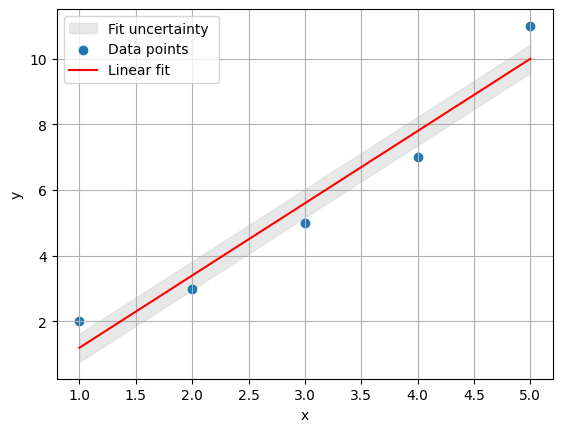

In [19]:
Y = x * slope + intercept
m, n = len(y), 2
std_errors = np.std(y - Y) / np.sqrt(m - n)

y_top = Y + std_errors
y_bot = Y - std_errors
plt.fill_between(x, y_bot, y_top, color='lightgray', alpha=0.5, label=r'Fit uncertainty ')

plt.scatter(x, y, label='Data points')

plt.plot(x, slope * x + intercept, color='red', label='Linear fit')

plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')
plt.legend()

### Option 2: Simple visualization with ``seaborn`` module

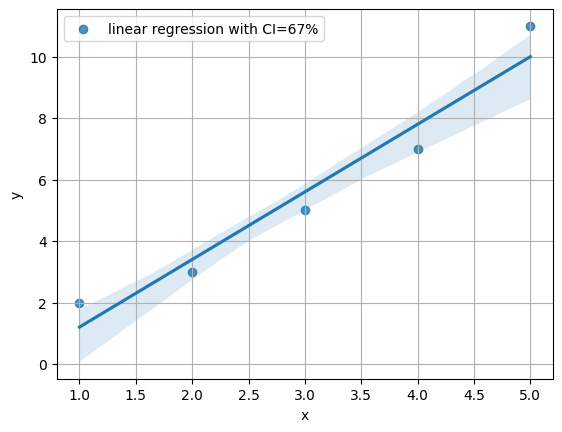

In [7]:
import seaborn as sns

sns.regplot(x=x, y=y, ci=67, label='linear regression with CI=67%')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('on')
plt.show()

### Option 3: Full prediction uncertainty with `np.linalg` module

####  **1. Notation Recap**

Let:

* $\mathbf{x}_i \in \mathbb{R}^n$ — the feature vector for the *i-th* observation (a row vector),
* $X \in \mathbb{R}^{m \times n}$ — the design matrix (rows are the $\mathbf{x}_i$),
* $\hat{\boldsymbol{\beta}} = (X^\top X)^{-1} X^\top \mathbf{y}$ — the estimated coefficients,
* $\hat{Y}(\mathbf{x}_i) = \mathbf{x}_i^\top \hat{\boldsymbol{\beta}}$ — the predicted value.

---

####  **2. Uncertainty in $\hat{Y}(\mathbf{x}_i)$: Variance**

The **variance** of $\hat{Y}(\mathbf{x}_i)$ is given by:

$$
\mathrm{Var}(\hat{Y}(\mathbf{x}_i)) = \sigma^2 \, \mathbf{x}_i^\top (X^\top X)^{-1} \mathbf{x}_i
$$

Where:

$\sigma^2$ is the variance of the residuals (estimated from data as the mean squared error of the model).

---

#### **3. Estimating $\sigma^2$**

In practice, $\sigma^2$ is unknown and estimated from the data:

$$
\hat{\sigma}^2 = \frac{1}{m - n} \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$

---

#### **4. Standard Error of the Prediction**

The **standard error** (i.e., standard deviation of the prediction) is:

$$
\mathrm{SE}(\hat{Y}(\mathbf{x}_i)) = \hat{\sigma} \, \sqrt{\mathbf{x}_i^\top (X^\top X)^{-1} \mathbf{x}_i}
$$

This gives you a measure of **uncertainty** in the predicted value at $\mathbf{x}_i$, stemming from uncertainty in the estimated coefficients.

---

#### **5. Full Prediction Uncertainty (Including Noise)**

If you are interested in predicting a **new outcome** $y_{\text{new}}$ (not just the expected value), you must also include the noise term:

$$
\mathrm{Var}(y_{\text{new}}) = \sigma^2 + \sigma^2 \, \mathbf{x}_i^\top (X^\top X)^{-1} \mathbf{x}_i = \sigma^2 \left(1 + \mathbf{x}_i^\top (X^\top X)^{-1} \mathbf{x}_i\right)
$$

This is for **prediction intervals**, not just confidence intervals on the mean.



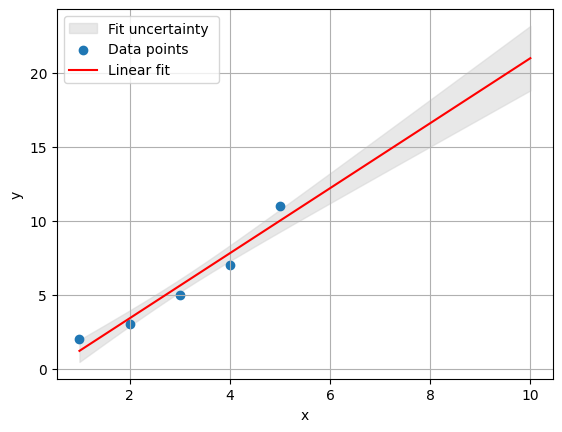

In [17]:
X = np.vstack([np.ones_like(x), x]).T # add dimension for intercept
XtX_inv = np.linalg.inv(X.T @ X)
beta_hat = XtX_inv @ X.T @ y
#slope = beta_hat[1]
#intercept = beta_hat[0]
Y = X @ beta_hat
residuals = y - Y
m, n = X.shape
sigma_squared_hat = np.sum(residuals**2) / (m - n)

std_errors = np.array([
    np.sqrt(sigma_squared_hat * (x_i @ XtX_inv @ x_i.T)) for x_i in X
])

# Prepare grid for prediction
X_pred_raw = np.linspace(1, 10, 100)
X_pred = np.vstack([np.ones_like(X_pred_raw), X_pred_raw]).T
y_pred = X_pred @ beta_hat

# Standard error for confidence intervals
std_errors = np.array([
    np.sqrt(sigma_squared_hat * (x_i @ XtX_inv @ x_i.T)) for x_i in X_pred
])

# one-sigma confidence interval
ci_upper = y_pred + std_errors
ci_lower = y_pred - std_errors
plt.fill_between(X_pred_raw, ci_lower, ci_upper, color='lightgray', alpha=0.5, label=r'Fit uncertainty ')

plt.scatter(x, y, label='Data points')

plt.plot(X_pred_raw, y_pred, color='red', label='Linear fit')

plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')
plt.legend()